<a href="https://colab.research.google.com/github/jon4589/tu-me-ama/blob/main/Elasticidade_de_Pre%C3%A7o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Instalar e importar bibliotecas necessárias
!pip install kaggle pandas numpy matplotlib seaborn scikit-learn statsmodels

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configuração de estilo para os gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


In [13]:
from google.colab import files
import pandas as pd
import io

# Fazer upload do arquivo
uploaded = files.upload()

# Carregar o arquivo CSV
file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

print("Arquivo carregado com sucesso!")
print(f"Tamanho do dataset: {df.shape}")
print("\nPrimeiras linhas:")
print(df.head())

Saving retail_sales_dataset.csv to retail_sales_dataset (1).csv
Arquivo carregado com sucesso!
Tamanho do dataset: (1000, 9)

Primeiras linhas:
   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


In [14]:
# Pré-processamento dos dados
def preparar_dados(df):
    """Prepara os dados para análise de elasticidade"""

    # Verificar e tratar valores missing
    print("Valores missing por coluna:")
    print(df.isnull().sum())

    # Converter data para datetime
    df['Date'] = pd.to_datetime(df['Date'])

    # Criar variáveis adicionais para análise
    df['Month'] = df['Date'].dt.month
    df['Year'] = df['Date'].dt.year
    df['Day'] = df['Date'].dt.day

    # Já temos Quantity e Price per Unit, que são perfeitas para elasticidade
    # Total Amount = Quantity * Price per Unit (já calculado)

    print("\n=== PRÉ-PROCESSAMENTO CONCLUÍDO ===")
    print(f"Categorias únicas: {df['Product Category'].unique()}")
    print(f"Período dos dados: {df['Date'].min()} a {df['Date'].max()}")

    return df

# Preparar os dados
df = preparar_dados(df)

Valores missing por coluna:
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

=== PRÉ-PROCESSAMENTO CONCLUÍDO ===
Categorias únicas: ['Beauty' 'Clothing' 'Electronics']
Período dos dados: 2023-01-01 00:00:00 a 2024-01-01 00:00:00


=== ANÁLISE EXPLORATÓRIA DO SEU DATASET ===


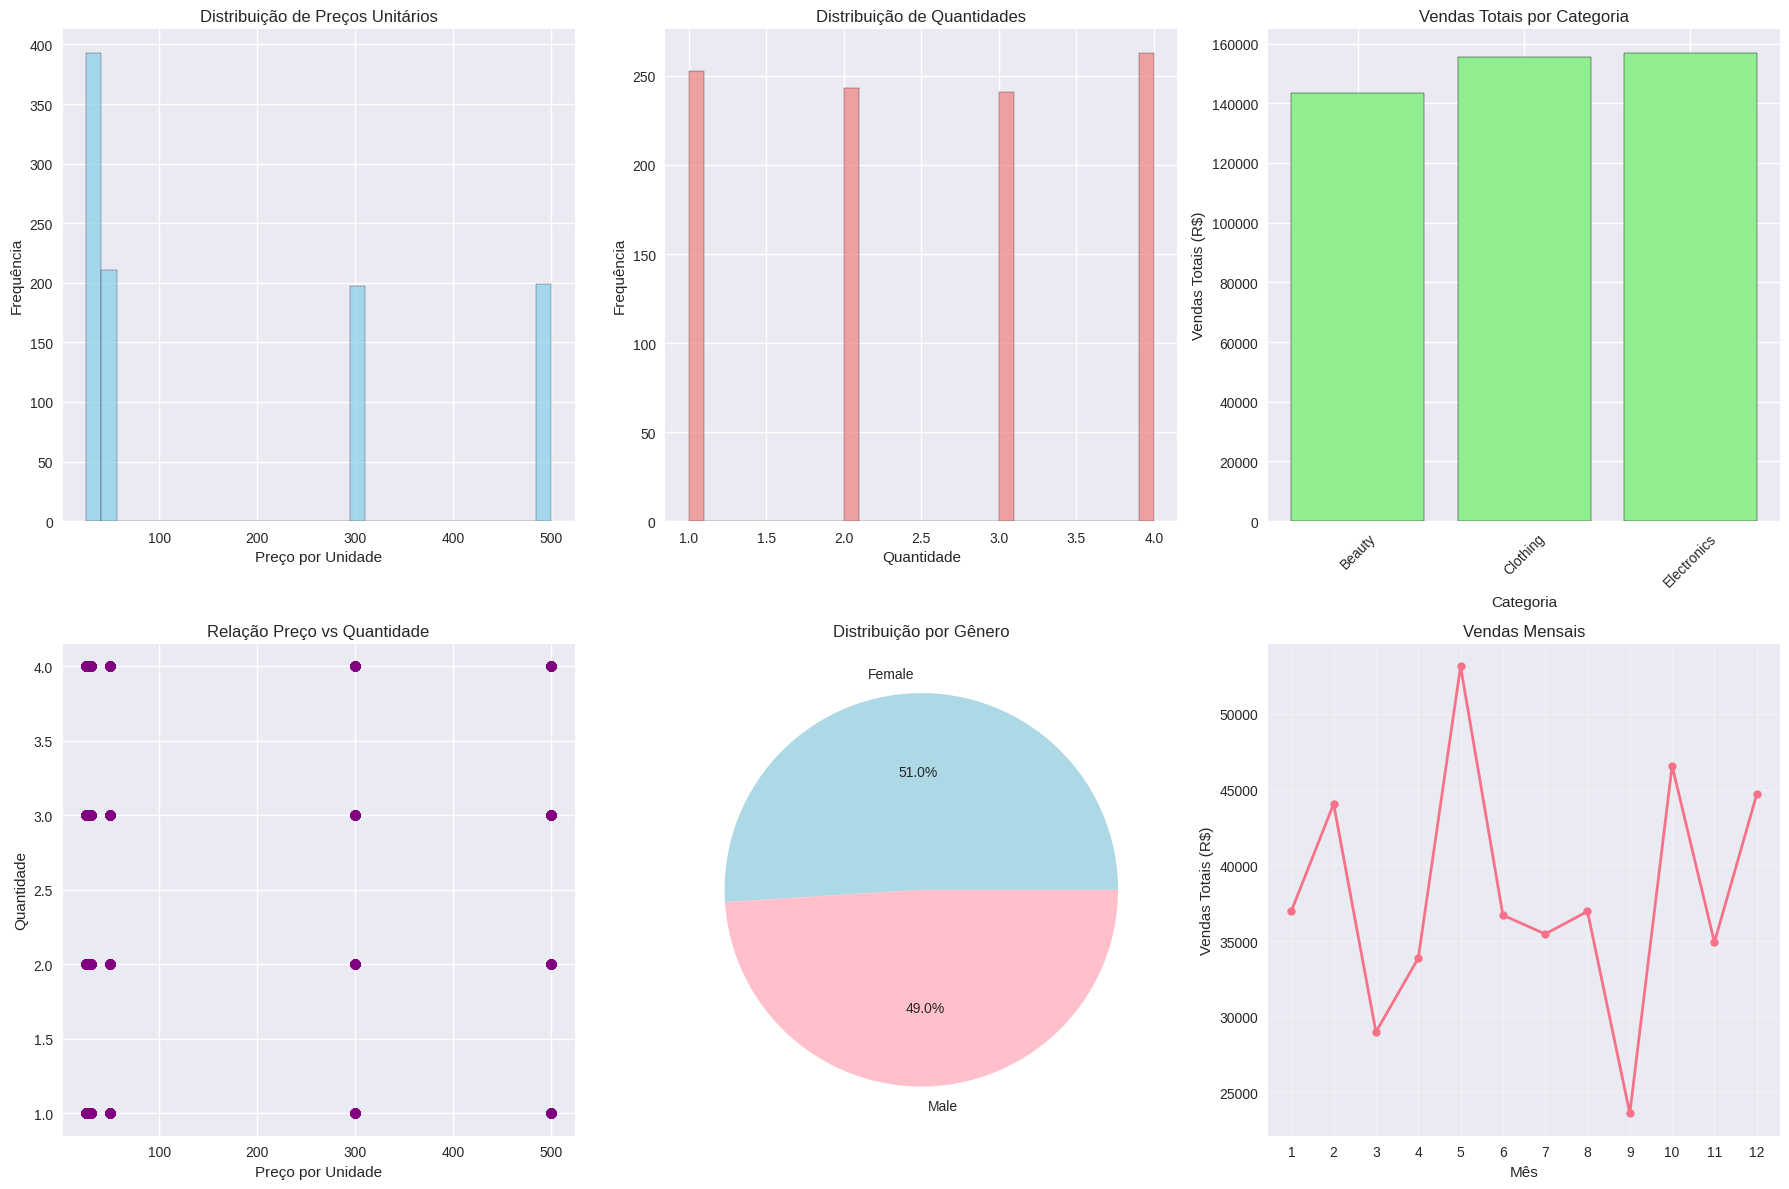


=== ESTATÍSTICAS POR CATEGORIA ===
                  Preço Médio  Desvio Preço  Preço Mín  Preço Máx  Qtd Média  \
Product Category                                                               
Beauty                 184.06        194.93         25        500       2.51   
Clothing               174.29        186.02         25        500       2.55   
Electronics            181.90        189.05         25        500       2.48   

                  Desvio Qtd  Qtd Mín  Qtd Máx  Vendas Totais  Nº Transações  
Product Category                                                              
Beauty                  1.10        1        4         143515            307  
Clothing                1.14        1        4         155580            351  
Electronics             1.15        1        4         156905            342  


In [15]:
# Análise Exploratória Específica para Seu Dataset
def analise_exploratoria_personalizada(df):
    print("=== ANÁLISE EXPLORATÓRIA DO SEU DATASET ===")

    fig, axes = plt.subplots(2, 3, figsize=(18, 12))

    # 1. Distribuição de preços
    axes[0, 0].hist(df['Price per Unit'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0, 0].set_title('Distribuição de Preços Unitários')
    axes[0, 0].set_xlabel('Preço por Unidade')
    axes[0, 0].set_ylabel('Frequência')

    # 2. Distribuição de quantidades
    axes[0, 1].hist(df['Quantity'], bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
    axes[0, 1].set_title('Distribuição de Quantidades')
    axes[0, 1].set_xlabel('Quantidade')
    axes[0, 1].set_ylabel('Frequência')

    # 3. Vendas por categoria
    vendas_categoria = df.groupby('Product Category')['Total Amount'].sum()
    axes[0, 2].bar(vendas_categoria.index, vendas_categoria.values, color='lightgreen', edgecolor='black')
    axes[0, 2].set_title('Vendas Totais por Categoria')
    axes[0, 2].set_xlabel('Categoria')
    axes[0, 2].set_ylabel('Vendas Totais (R$)')
    axes[0, 2].tick_params(axis='x', rotation=45)

    # 4. Relação preço vs quantidade
    axes[1, 0].scatter(df['Price per Unit'], df['Quantity'], alpha=0.6, color='purple')
    axes[1, 0].set_title('Relação Preço vs Quantidade')
    axes[1, 0].set_xlabel('Preço por Unidade')
    axes[1, 0].set_ylabel('Quantidade')

    # 5. Distribuição por gênero
    genero_count = df['Gender'].value_counts()
    axes[1, 1].pie(genero_count.values, labels=genero_count.index, autopct='%1.1f%%', colors=['lightblue', 'pink'])
    axes[1, 1].set_title('Distribuição por Gênero')

    # 6. Vendas mensais
    vendas_mensais = df.groupby('Month')['Total Amount'].sum()
    axes[1, 2].plot(vendas_mensais.index, vendas_mensais.values, marker='o', linewidth=2, markersize=6)
    axes[1, 2].set_title('Vendas Mensais')
    axes[1, 2].set_xlabel('Mês')
    axes[1, 2].set_ylabel('Vendas Totais (R$)')
    axes[1, 2].set_xticks(range(1, 13))
    axes[1, 2].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Estatísticas por categoria
    print("\n=== ESTATÍSTICAS POR CATEGORIA ===")
    stats_categoria = df.groupby('Product Category').agg({
        'Price per Unit': ['mean', 'std', 'min', 'max'],
        'Quantity': ['mean', 'std', 'min', 'max'],
        'Total Amount': 'sum',
        'Transaction ID': 'count'
    }).round(2)

    stats_categoria.columns = ['Preço Médio', 'Desvio Preço', 'Preço Mín', 'Preço Máx',
                             'Qtd Média', 'Desvio Qtd', 'Qtd Mín', 'Qtd Máx',
                             'Vendas Totais', 'Nº Transações']
    print(stats_categoria)

# Executar análise exploratória
analise_exploratoria_personalizada(df)

In [16]:
# Cálculo da Elasticidade Preço da Demanda para Seu Dataset
def calcular_elasticidade_dataset(df, categoria=None):
    """
    Calcula a elasticidade preço da demanda usando regressão linear
    em escala logarítmica para o dataset de vendas
    """

    # Filtrar por categoria se especificada
    if categoria:
        dados = df[df['Product Category'] == categoria].copy()
        print(f"\n=== ANÁLISE DE ELASTICIDADE - {categoria.upper()} ===")
    else:
        dados = df.copy()
        print(f"\n=== ANÁLISE DE ELASTICIDADE - TODOS OS PRODUTOS ===")

    # Para elasticidade, precisamos agrupar por preço e calcular quantidade média
    # Ou usar dados individuais se assumirmos que cada transação é um ponto de demanda

    # Usar dados individuais (cada transação representa a demanda naquele preço)
    dados_agg = dados.groupby(['Price per Unit']).agg({
        'Quantity': 'mean',
        'Transaction ID': 'count'
    }).reset_index()

    dados_agg = dados_agg[dados_agg['Transaction ID'] >= 3]  # Filtrar preços com poucas observações

    if len(dados_agg) < 5:
        print("Dados insuficientes para análise confiável")
        return None, None, None

    # Usar logaritmos para calcular elasticidade
    dados_agg['log_price'] = np.log(dados_agg['Price per Unit'])
    dados_agg['log_quantity'] = np.log(dados_agg['Quantity'])

    # Remover valores infinitos ou NaN
    dados_agg = dados_agg.replace([np.inf, -np.inf], np.nan).dropna()

    if len(dados_agg) < 3:
        print("Dados insuficientes após transformação logarítmica")
        return None, None, None

    # Preparar dados para regressão
    X = dados_agg[['log_price']]
    y = dados_agg['log_quantity']

    # Adicionar constante para regressão
    X = sm.add_constant(X)

    # Executar regressão
    modelo = sm.OLS(y, X).fit()

    # Coeficiente de elasticidade
    elasticidade = modelo.params['log_price']

    # Resultados
    print(f"Elasticidade Preço da Demanda: {elasticidade:.4f}")
    print(f"R² do modelo: {modelo.rsquared:.4f}")
    print(f"P-valor: {modelo.pvalues['log_price']:.4f}")
    print(f"Número de observações: {len(dados_agg)}")

    # Interpretação
    if elasticidade < -1:
        interpretacao = "ELÁSTICA (demanda sensível a mudanças de preço)"
    elif elasticidade > -1:
        interpretacao = "INELÁSTICA (demanda pouco sensível a mudanças de preço)"
    else:
        interpretacao = "ELASTICIDADE UNITÁRIA"

    print(f"Interpretação: {interpretacao}")

    return modelo, dados_agg, elasticidade

# Calcular elasticidade para todas as categorias
print("=== ELASTICIDADE GERAL ===")
modelo_geral, dados_geral, elasticidade_geral = calcular_elasticidade_dataset(df)

=== ELASTICIDADE GERAL ===

=== ANÁLISE DE ELASTICIDADE - TODOS OS PRODUTOS ===
Elasticidade Preço da Demanda: 0.0109
R² do modelo: 0.2664
P-valor: 0.3733
Número de observações: 5
Interpretação: INELÁSTICA (demanda pouco sensível a mudanças de preço)


=== COMPARAÇÃO DE ELASTICIDADE POR CATEGORIA ===

=== ANÁLISE DE ELASTICIDADE - BEAUTY ===
Elasticidade Preço da Demanda: 0.0165
R² do modelo: 0.2728
P-valor: 0.3666
Número de observações: 5
Interpretação: INELÁSTICA (demanda pouco sensível a mudanças de preço)

=== ANÁLISE DE ELASTICIDADE - CLOTHING ===
Elasticidade Preço da Demanda: 0.0021
R² do modelo: 0.0050
P-valor: 0.9099
Número de observações: 5
Interpretação: INELÁSTICA (demanda pouco sensível a mudanças de preço)

=== ANÁLISE DE ELASTICIDADE - ELECTRONICS ===
Elasticidade Preço da Demanda: 0.0162
R² do modelo: 0.2206
P-valor: 0.4247
Número de observações: 5
Interpretação: INELÁSTICA (demanda pouco sensível a mudanças de preço)


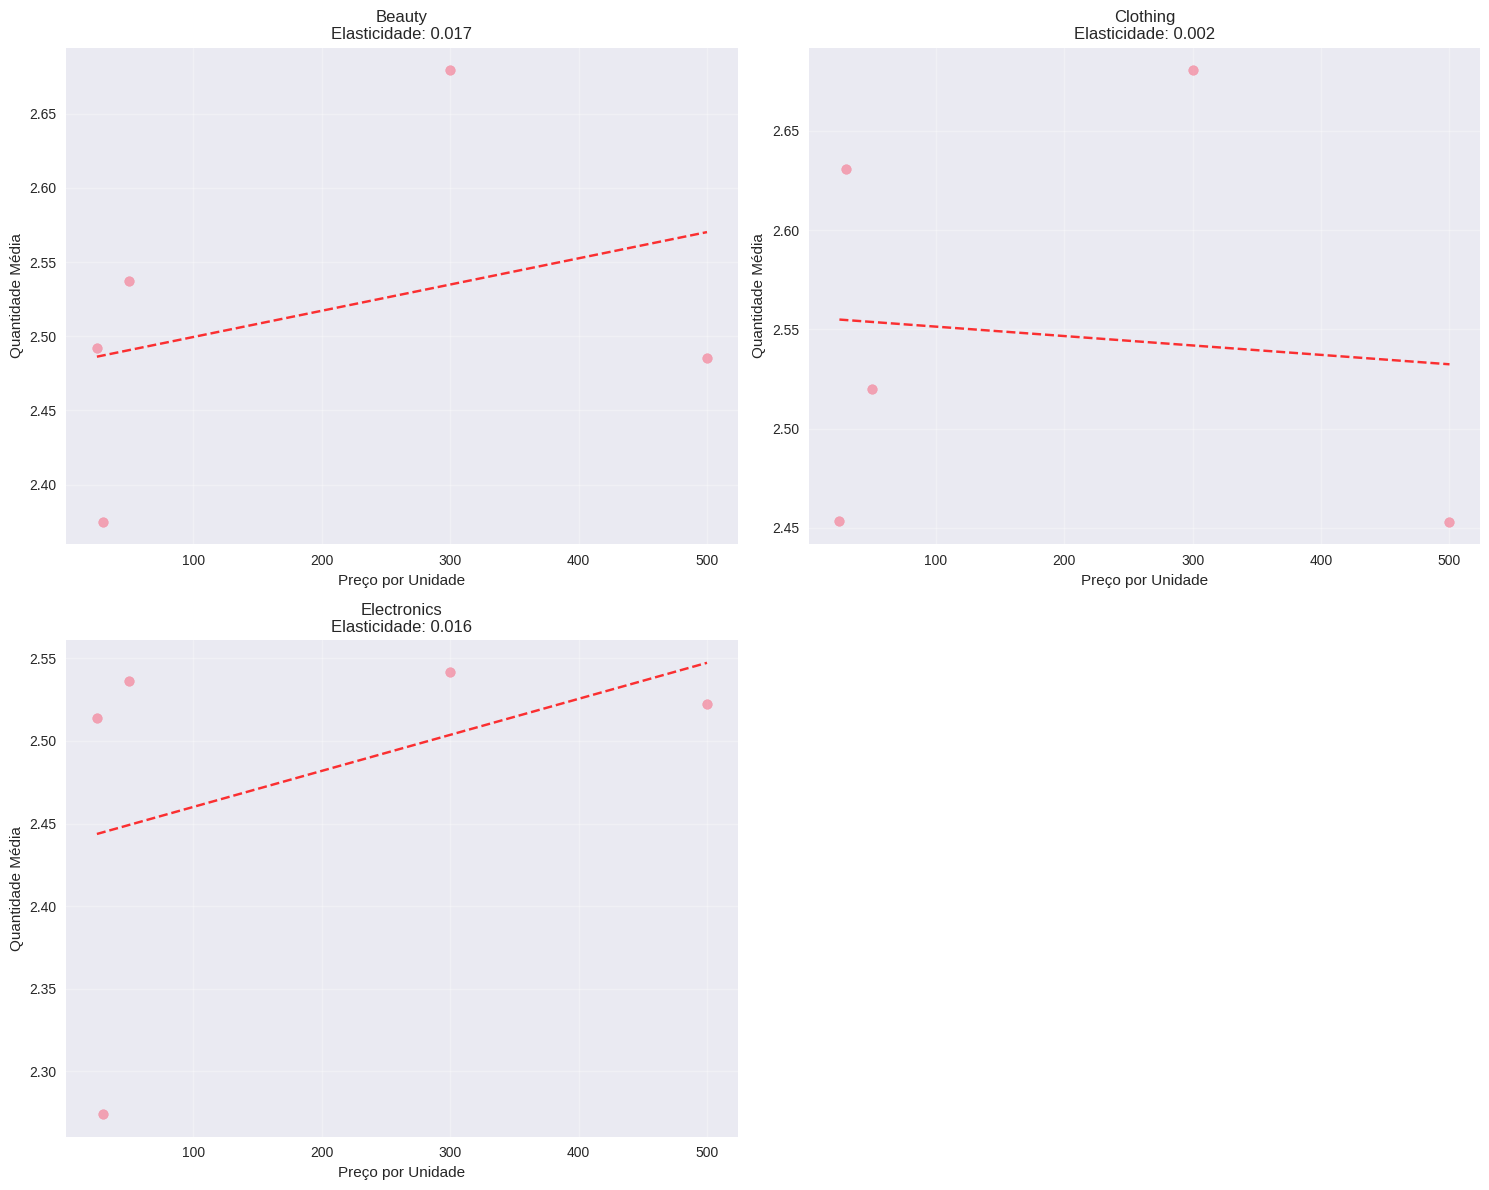


=== TABELA COMPARATIVA ===
     Categoria  Elasticidade      R²  Observações
0       Beauty        0.0165  0.2728            5
1     Clothing        0.0021  0.0050            5
2  Electronics        0.0162  0.2206            5


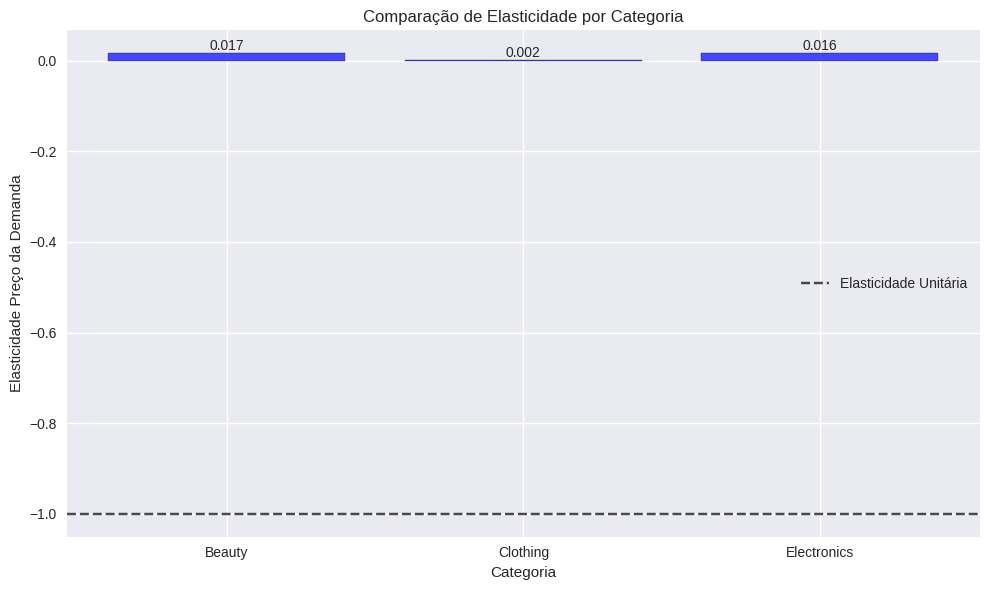

In [17]:
# Análise de Elasticidade por Categoria
def analise_elasticidade_por_categoria(df):
    """Calcula e compara elasticidades por categoria de produto"""

    categorias = df['Product Category'].unique()
    resultados = []

    print("=== COMPARAÇÃO DE ELASTICIDADE POR CATEGORIA ===")

    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.ravel()

    for i, categoria in enumerate(categorias):
        if i < 4:  # Para garantir que não ultrapassamos o número de subplots
            # Calcular elasticidade para a categoria
            modelo, dados_cat, elasticidade = calcular_elasticidade_dataset(df, categoria)

            if modelo is not None:
                # Armazenar resultados
                resultados.append({
                    'Categoria': categoria,
                    'Elasticidade': elasticidade,
                    'R²': modelo.rsquared,
                    'Observações': len(dados_cat)
                })

                # Gráfico por categoria
                axes[i].scatter(dados_cat['Price per Unit'], dados_cat['Quantity'], alpha=0.6)

                # Adicionar linha de tendência
                try:
                    z = np.polyfit(dados_cat['Price per Unit'], dados_cat['Quantity'], 1)
                    p = np.poly1d(z)
                    axes[i].plot(dados_cat['Price per Unit'], p(dados_cat['Price per Unit']),
                               "r--", alpha=0.8)
                except:
                    pass

                axes[i].set_xlabel('Preço por Unidade')
                axes[i].set_ylabel('Quantidade Média')
                axes[i].set_title(f'{categoria}\nElasticidade: {elasticidade:.3f}')
                axes[i].grid(True, alpha=0.3)
            else:
                print(f"\nNão foi possível calcular elasticidade para {categoria}")

    # Remover subplots não utilizados
    for i in range(len(categorias), 4):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

    # Tabela comparativa
    if resultados:
        df_resultados = pd.DataFrame(resultados)
        print("\n=== TABELA COMPARATIVA ===")
        print(df_resultados.round(4))

        # Gráfico de barras comparativo
        plt.figure(figsize=(10, 6))
        bars = plt.bar(df_resultados['Categoria'], df_resultados['Elasticidade'],
                       color=['red' if x < -1 else 'blue' for x in df_resultados['Elasticidade']],
                       edgecolor='black', alpha=0.7)

        plt.axhline(y=-1, color='black', linestyle='--', alpha=0.7, label='Elasticidade Unitária')
        plt.xlabel('Categoria')
        plt.ylabel('Elasticidade Preço da Demanda')
        plt.title('Comparação de Elasticidade por Categoria')
        plt.legend()

        # Adicionar valores nas barras
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.3f}',
                    ha='center', va='bottom' if height > 0 else 'top')

        plt.tight_layout()
        plt.show()

        return df_resultados
    else:
        return None

# Executar análise por categoria
resultados_categorias = analise_elasticidade_por_categoria(df)


=== ANÁLISE DE ELASTICIDADE - TODOS OS PRODUTOS ===
Elasticidade Preço da Demanda: 0.0109
R² do modelo: 0.2664
P-valor: 0.3733
Número de observações: 5
Interpretação: INELÁSTICA (demanda pouco sensível a mudanças de preço)

=== SIMULAÇÃO DE MUDANÇA DE PREÇO ===
Preço médio atual: R$ 179.89
Quantidade média atual: 2.51
Receita atual por transação: R$ 452.24
Elasticidade: 0.011


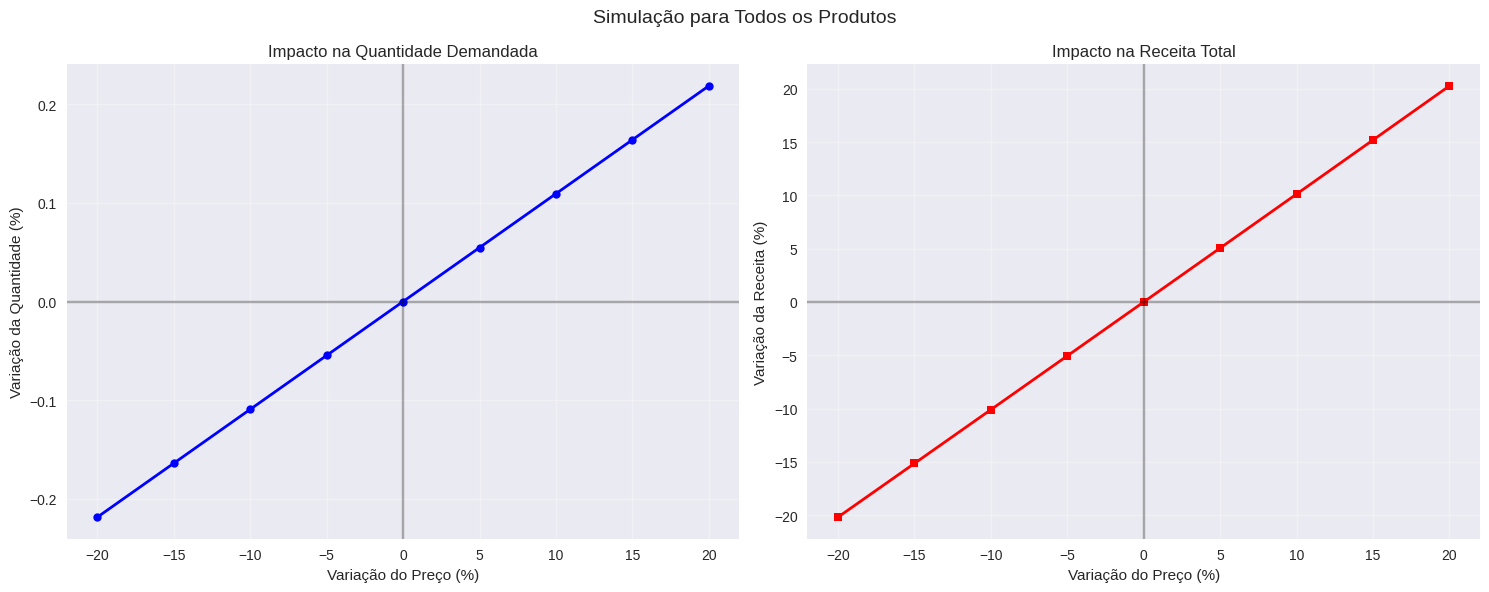


Tabela de Simulação:


,Variacao_Preco_Perc,Novo_Preco,Variacao_Quantidade_Perc,Nova_Quantidade,Nova_Receita,Variacao_Receita_Perc
0,-20.0,143.9120,-0.2188,2.5085,361.0032,-20.1750
1,-15.0,152.9065,-0.1641,2.5099,383.7762,-15.1395
2,-10.0,161.9010,-0.1094,2.5112,406.5739,-10.0985
3,-5.0,170.8955,-0.0547,2.5126,429.3963,-5.0520
4,-0.0,179.8900,-0.0000,2.5140,452.2435,0.0000
5,5.0,188.8845,0.0547,2.5154,475.1154,5.0574
6,10.0,197.8790,0.1094,2.5168,498.0120,10.1203
7,15.0,206.8735,0.1641,2.5181,520.9334,15.1887
8,20.0,215.8680,0.2188,2.5195,543.8795,20.2625



=== RECOMENDAÇÃO ÓTIMA ===
Variação de preço que maximiza receita: 20.00%
Novo preço sugerido: R$ 215.87
Receita máxima possível: R$ 543.88
Aumento na receita: 20.26%


from matplotlib import pyplot as plt
_df_0['Variacao_Preco_Perc'].plot(kind='hist', bins=20, title='Variacao_Preco_Perc')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Novo_Preco'].plot(kind='hist', bins=20, title='Novo_Preco')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Variacao_Quantidade_Perc'].plot(kind='hist', bins=20, title='Variacao_Quantidade_Perc')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Nova_Quantidade'].plot(kind='hist', bins=20, title='Nova_Quantidade')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Variacao_Preco_Perc', y='Novo_Preco', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Novo_Preco', y='Variacao_Quantidade_Perc', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Variacao_Quantidade_Perc', y='Nova_Quantidade', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Nova_Quantidade', y='Nova_Receita', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Variacao_Preco_Perc']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Variacao_Preco_Perc'}, axis=1)
              .sort_values('Variacao_Preco_Perc', ascending=True))
  xs = counted['Variacao_Preco_Perc']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Variacao_Preco_Perc', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Variacao_Preco_Perc')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Novo_Preco']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Novo_Preco'}, axis=1)
              .sort_values('Novo_Preco', ascending=True))
  xs = counted['Novo_Preco']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Novo_Preco', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Novo_Preco')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Variacao_Quantidade_Perc']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Variacao_Quantidade_Perc'}, axis=1)
              .sort_values('Variacao_Quantidade_Perc', ascending=True))
  xs = counted['Variacao_Quantidade_Perc']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Variacao_Quantidade_Perc', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Variacao_Quantidade_Perc')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Nova_Quantidade']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Nova_Quantidade'}, axis=1)
              .sort_values('Nova_Quantidade', ascending=True))
  xs = counted['Nova_Quantidade']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Nova_Quantidade', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Nova_Quantidade')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_12['Variacao_Preco_Perc'].plot(kind='line', figsize=(8, 4), title='Variacao_Preco_Perc')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Novo_Preco'].plot(kind='line', figsize=(8, 4), title='Novo_Preco')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Variacao_Quantidade_Perc'].plot(kind='line', figsize=(8, 4), title='Variacao_Quantidade_Perc')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Nova_Quantidade'].plot(kind='line', figsize=(8, 4), title='Nova_Quantidade')
plt.gca().spines[['top', 'right']].set_visible(False)

In [18]:
# Simulação de Impacto de Mudanças de Preço
def simular_mudanca_preco_dataset(df, categoria=None, variacao_preco=0.1):
    """
    Simula o impacto de mudanças de preço na quantidade demandada e receita
    """

    if categoria:
        dados = df[df['Product Category'] == categoria].copy()
        titulo = f"Simulação para {categoria}"
    else:
        dados = df.copy()
        titulo = "Simulação para Todos os Produtos"

    # Calcular elasticidade atual
    modelo, dados_elasticidade, elasticidade = calcular_elasticidade_dataset(df, categoria)

    if modelo is None:
        print("Não foi possível realizar a simulação - elasticidade não calculada")
        return None

    # Preço médio atual
    preco_medio = dados['Price per Unit'].mean()
    quantidade_media = dados['Quantity'].mean()
    receita_atual = preco_medio * quantidade_media

    print(f"\n=== SIMULAÇÃO DE MUDANÇA DE PREÇO ===")
    print(f"Preço médio atual: R$ {preco_medio:.2f}")
    print(f"Quantidade média atual: {quantidade_media:.2f}")
    print(f"Receita atual por transação: R$ {receita_atual:.2f}")
    print(f"Elasticidade: {elasticidade:.3f}")

    # Simular diferentes variações de preço
    variacoes = np.arange(-0.2, 0.21, 0.05)  # De -20% a +20%

    resultados = []

    for variacao in variacoes:
        novo_preco = preco_medio * (1 + variacao)

        # Calcular nova quantidade usando a elasticidade
        variacao_quantidade = elasticidade * variacao
        nova_quantidade = quantidade_media * (1 + variacao_quantidade)

        nova_receita = novo_preco * nova_quantidade
        variacao_receita = (nova_receita - receita_atual) / receita_atual * 100

        resultados.append({
            'Variacao_Preco_Perc': variacao * 100,
            'Novo_Preco': novo_preco,
            'Variacao_Quantidade_Perc': variacao_quantidade * 100,
            'Nova_Quantidade': nova_quantidade,
            'Nova_Receita': nova_receita,
            'Variacao_Receita_Perc': variacao_receita
        })

    df_simulacao = pd.DataFrame(resultados)

    # Visualizar resultados
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Impacto na quantidade
    axes[0].plot(df_simulacao['Variacao_Preco_Perc'], df_simulacao['Variacao_Quantidade_Perc'],
                marker='o', linewidth=2, markersize=6, color='blue')
    axes[0].axhline(y=0, color='black', linestyle='-', alpha=0.3)
    axes[0].axvline(x=0, color='black', linestyle='-', alpha=0.3)
    axes[0].set_xlabel('Variação do Preço (%)')
    axes[0].set_ylabel('Variação da Quantidade (%)')
    axes[0].set_title('Impacto na Quantidade Demandada')
    axes[0].grid(True, alpha=0.3)

    # Impacto na receita
    axes[1].plot(df_simulacao['Variacao_Preco_Perc'], df_simulacao['Variacao_Receita_Perc'],
                marker='s', color='red', linewidth=2, markersize=6)
    axes[1].axhline(y=0, color='black', linestyle='-', alpha=0.3)
    axes[1].axvline(x=0, color='black', linestyle='-', alpha=0.3)
    axes[1].set_xlabel('Variação do Preço (%)')
    axes[1].set_ylabel('Variação da Receita (%)')
    axes[1].set_title('Impacto na Receita Total')
    axes[1].grid(True, alpha=0.3)

    plt.suptitle(titulo, fontsize=14)
    plt.tight_layout()
    plt.show()

    # Mostrar tabela com resultados
    print("\nTabela de Simulação:")
    display(df_simulacao.round(4))

    # Encontrar variação ótima de preço (que maximiza receita)
    idx_otimo = df_simulacao['Nova_Receita'].idxmax()
    otimo = df_simulacao.loc[idx_otimo]

    print(f"\n=== RECOMENDAÇÃO ÓTIMA ===")
    print(f"Variação de preço que maximiza receita: {otimo['Variacao_Preco_Perc']:.2f}%")
    print(f"Novo preço sugerido: R$ {otimo['Novo_Preco']:.2f}")
    print(f"Receita máxima possível: R$ {otimo['Nova_Receita']:.2f}")
    print(f"Aumento na receita: {otimo['Variacao_Receita_Perc']:.2f}%")

    return df_simulacao

# Executar simulação para todos os produtos
if modelo_geral is not None:
    simulacao_geral = simular_mudanca_preco_dataset(df)